# CAPSTONE PROJECT (CONTECH UNIVERSITY)
## COURSE INSTRUCTOR: DR SUMAN SAHA
## COLLABORATORS: 
#####   ZAKRIA SAAD
#####   TINASHE HAFE
#####   TRYMORE NCUBE

# PROJECT TOPIC: FRAUD DETECTION IN ELECTRICITY AND GAS CONSUMPTION

### ABOUT DATASET:
The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers.

## Introduction:
Utility businesses provide an important service to developed societies, supplying electricity, gas, and other types of use-able energy types to households, companies, and factories.

The necessary infrastructure that guarantees services includes the kilometers of pipes or electric lines that transport the energy to the millions of customers, this infrastructure must be protected and maintained against all types of risks including technical losses or non-technical losses (fraud).

A crucial problem that these companies face is the imbalance between the energy billed and the energy delivered, this problem is called energy losses caused by fraud or Technical causes like meter malfunctions, pipes damages and other technical issues.

Ways of committing fraud include splicing the pipes to pass the meter, tampering with the meter to stop counting or to slow it down, and simply connecting to the distribution network without even having a contract with the company. On the other hand, an unexpected malfunction of the meter also results in energy loss for the company.

## Datasets:
In this notebook, we will be working and focusing on the Client train data set and the invoice train data set.

Client data set is about the client’s details like the reason that district and the tariff type and something like that.

The invoice data set is including the invoice details like the consumption of energy for many levels at the tariff type, the counter Like electricity and gas, the old index and the new Index, And Other important features.

We’re going to have more details about these data sets while doing exploratory data analysis EDA.

### To do:
Loading libraries</br>
Importing data</br>
Exploratory data analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pandas_profiling.profile_report as report
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# Importing the liberaries

In [ ]:
import pandas as pd
#from pandas_profiling import profile_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback

In [ ]:
client=pd.read_csv('/content/drive/MyDrive/client_train.csv')
invoice=pd.read_csv('/content/drive/MyDrive/invoice_train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
client.shape

(135493, 6)

In [ ]:
invoice.shape

(4476749, 16)

In [ ]:
#client.profile_report()

# CLIENT DATA

In [ ]:
client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
client.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [ ]:
corr = client.corr()

# Plot the correlation heatmap
fig = px.imshow(corr, 
                labels=dict(color='Correlation Coefficient'), 
                color_continuous_scale='Viridis')

fig.show()

# Target feature Distribution

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

tg = client.groupby('target')['client_id'].count()
total_clients = client.shape[0]
tg_percent = (tg / total_clients) * 100

fig = px.bar(tg, x=tg.index, y=tg.values)
fig.add_trace(
    go.Bar(
        x=tg.index,
        y=tg_percent,
        text=['{:.2f}%'.format(val) for val in tg_percent],
        textposition='outside',
        textfont=dict(
            color='black',
            size=12
        ),
        cliponaxis=False
    )
)
fig.show()


In [ ]:
client['client_catg']=client['client_catg'].astype('object')
client['disrict']=client['disrict'].astype('object')
client['region']=client['region'].astype('object')

In [ ]:
def target_distribution_by(feat_name):
    dist_df = client.loc[:, ['target', feat_name]]
    dist_df = dist_df.groupby(['target', feat_name]).size().reset_index(name='counts')
    dist_df['percent'] = dist_df['counts']/dist_df['counts'].sum()*100
    
    g = sns.FacetGrid(dist_df, col=feat_name, col_wrap=3, height=4)
    g = g.map(sns.barplot, 'target', 'counts', palette=['#6495ED', '#DE3163'], 
            edgecolor='black')
    g.set_titles("Target variable distribution by {}".format(feat_name))
    g.set_ylabels("Counts")
    
    for ax, name in zip(g.axes.flat, dist_df[feat_name].unique()):
        for i, bar in enumerate(ax.patches):
            ax.text(bar.xy[0] + bar.get_width()/2, bar.xy[1] + bar.get_height()/2, str(int(bar.get_height())),
                    ha='center', va='center', color='black')
        ax.text(0.5, -0.2, name, transform=ax.transAxes, ha='center', va='center', color='gray')
    g.fig.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()



## Distribution by District

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



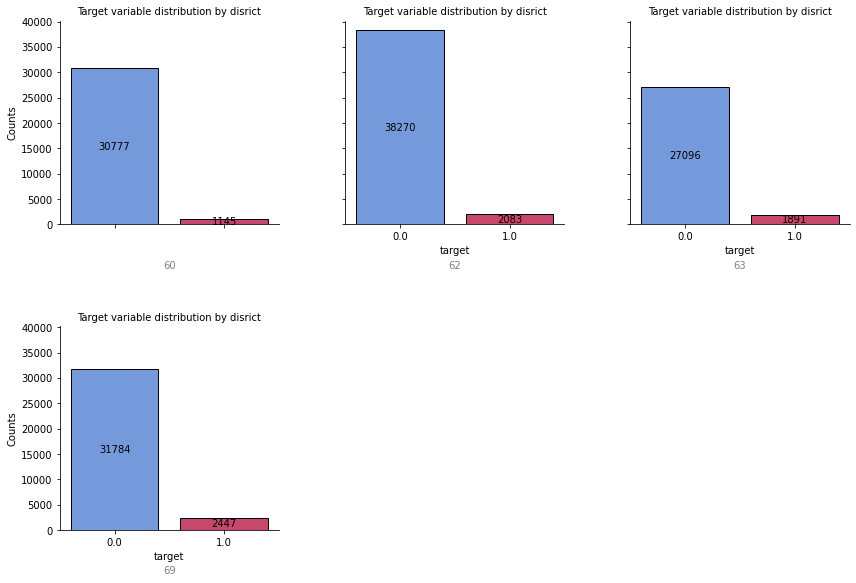

In [ ]:
#need to show the district names
target_distribution_by(feat_name='disrict')

## Distribution by Client Category

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



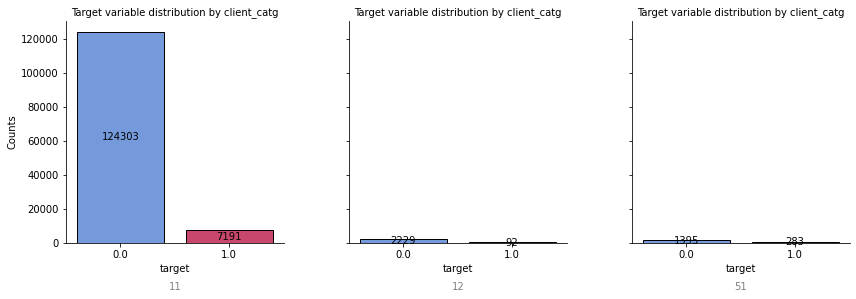

In [ ]:
target_distribution_by('client_catg')

In [ ]:
client.loc[client.client_catg==51]

,disrict,client_id,client_catg,region,creation_date,target
29,69,train_Client_100021,51,104,13/07/2017,0.00
136,69,train_Client_100118,51,104,16/12/2014,0.00
233,63,train_Client_100205,51,306,02/06/2010,0.00
267,62,train_Client_100236,51,301,28/03/2012,1.00
502,60,train_Client_100448,51,101,29/05/2015,0.00
...,...,...,...,...,...,...
135070,69,train_Client_99618,51,103,27/10/2008,0.00
135098,60,train_Client_99643,51,101,08/08/2011,0.00
135172,60,train_Client_9971,51,101,14/04/2010,0.00
135402,69,train_Client_99917,51,103,11/04/2011,1.00


## Distribution by Region

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



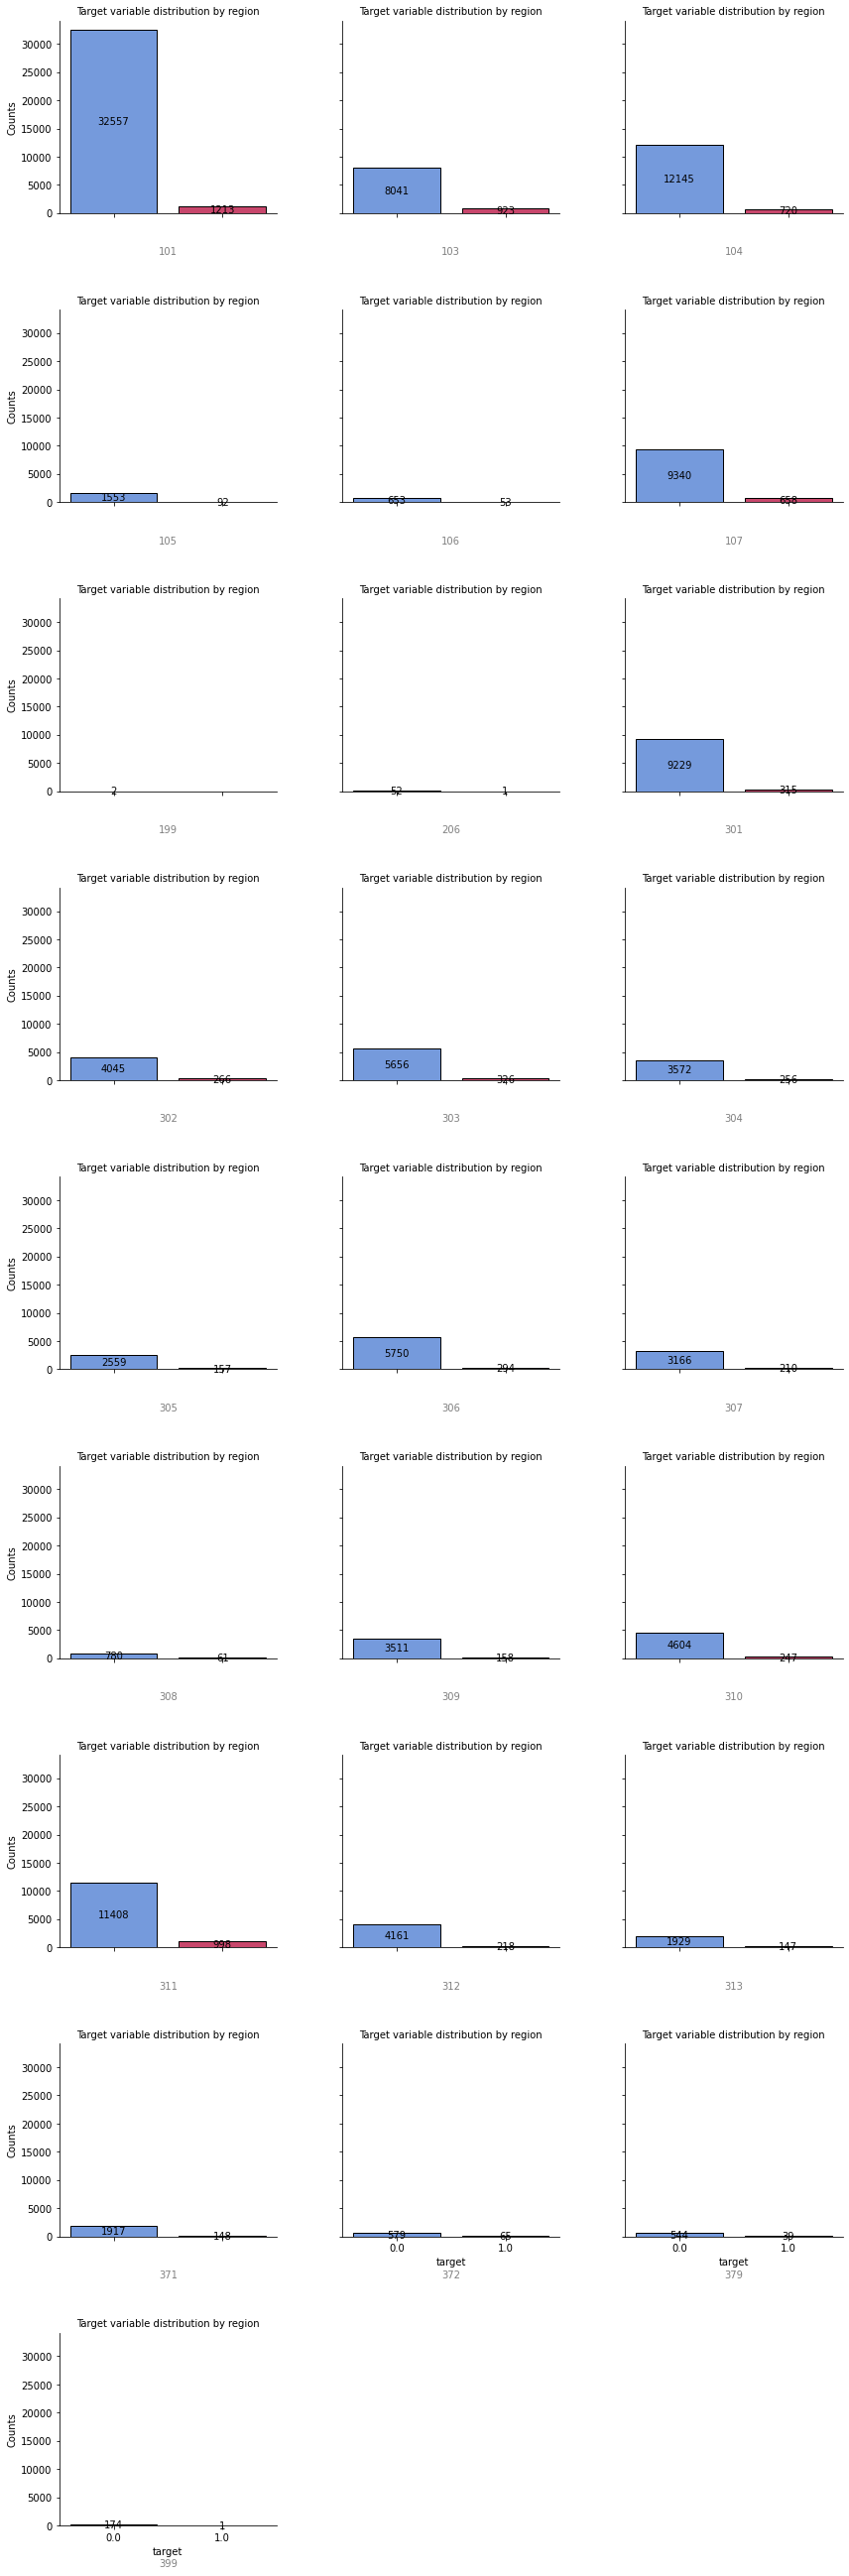

In [ ]:
target_distribution_by('region')

In [ ]:
client[(client.region == 206) | (client.region == 199) | (client.region == 399)]

,disrict,client_id,client_catg,region,creation_date,target
382,63,train_Client_10034,11,399,13/12/2007,0.00
442,63,train_Client_100394,11,399,14/12/1988,0.00
844,63,train_Client_100756,11,399,14/10/1982,0.00
1189,63,train_Client_101066,11,399,03/05/1991,0.00
1401,63,train_Client_101257,11,399,18/04/1981,0.00
...,...,...,...,...,...,...
132898,63,train_Client_97663,11,399,27/11/1996,0.00
132995,69,train_Client_97750,11,206,21/10/2011,0.00
133211,63,train_Client_97945,11,399,13/06/1994,0.00
133783,63,train_Client_9846,11,399,26/03/1986,0.00


## Customers Joined throughout the years

In [ ]:
import plotly.express as px
import pandas as pd
client1=client
client1['creation_date'] = pd.to_datetime(client1['creation_date'], format='%d/%m/%Y')
client1['year'] = client1['creation_date'].dt.year
client1['month'] = client1['creation_date'].dt.month
client1['client_catg'] = client1['client_catg'].astype('category')

num_customer_year = (
    client1.groupby(['year', 'client_catg'])
    .size()
    .reset_index(name='counts')
    .sort_values('year', ascending=False)
)
fig = px.line(num_customer_year, x='year', y='counts', color='client_catg', title='Number of customers by year 1997 - 2018')
fig.update_xaxes(range=[1997,2018], tickvals=list(range(1997, 2019, 3)))
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()
fig_log = px.line(num_customer_year, x='year', y='counts', color='client_catg', log_y=True, title='Number of customers by year 1997 - 2018 (log10)')
fig_log.update_xaxes(range=[1997,2018], tickvals=list(range(1997, 2019, 3)))
fig_log.update_layout(xaxis_title=None, yaxis_title=None, legend=dict(title=None, traceorder='normal'))
fig_log.show()


# INVOICE DATA 

In [ ]:
invoice1=invoice
invoice1['invoice_date'] = pd.to_datetime(invoice1['invoice_date'], format='%Y/%m/%d')
invoice1['year'] = invoice1['invoice_date'].dt.year
invoice1['month'] = invoice1['invoice_date'].dt.month

In [ ]:
invoice

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,2014,3
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,2013,3
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,2015,3
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,2015,7
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC,2005,8
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC,2005,12
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC,1996,9
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC,1996,5


In [ ]:
invoice['counter_type'].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

In [ ]:
# counter_type={'ELEC':'1','GAZ':'0'}
# invoice['counter_type']=invoice['counter_type'].map(counter_type)

In [ ]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 18 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        object        
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          object        
 16  year                  int64         
 17  month                 int64         
dtypes: datetime64[ns](1), int64(14), object(3)

In [ ]:
invoice['tarif_type']=invoice['tarif_type'].astype('object')

## Distribution by Electricity and Gas Consumers

In [ ]:
import pandas as pd


df = invoice.loc[:, ['client_id', 'counter_type']]
df = df.drop_duplicates(subset=['client_id', 'counter_type'])
df = df.groupby(['counter_type']).agg({'client_id': 'count'}).reset_index()
df['perc'] = (df['client_id'] / df['client_id'].sum()) * 100
df = df.sort_values(by='perc', ascending=False)

fig = px.pie(df, values='client_id', names='counter_type', hole=.5, color='counter_type', color_discrete_sequence=['#ced4c7', '#f9d62e'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title={
        'text': "Proportion of Counter type (ELEC to GAZ)",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    annotations=[
        dict(
            text='Fraud Detection in Electricity and Gas Consumption',
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0,
            xanchor="left",
            yanchor="bottom"
        )
    ]
)

fig.show()


# Correlations

In [ ]:
corr = invoice.corr()

# Plot the correlation heatmap
fig = px.imshow(corr, 
                labels=dict(color='Correlation Coefficient'), 
                color_continuous_scale='Viridis')

fig.show()

In [ ]:
fraudulent_client = client1.loc[client['target'] == 1, 'client_id']
honest_client = client1.loc[client['target'] == 0, 'client_id']

### Discrepancies between Fradulent and Honest Consumers

In [ ]:
def con_comp(counter, cust_1, cust_2):
    clients_in_invoice = invoice1[(invoice1['counter_type'] == counter) & (invoice1['invoice_date'] >= "2005-01-01")].drop_duplicates(subset='client_id')['client_id'].tolist()
    fraudulent = list(set(clients_in_invoice) & set(fraudulent_client))
    honest = list(set(clients_in_invoice) & set(honest_client))

    counter_invoice= invoice1[(invoice1['counter_type'] == counter) & (invoice1['invoice_date'] >= "2005-01-01")]

    monthly_avg_con = counter_invoice.groupby(pd.Grouper(key='invoice_date', freq='M')).mean().reset_index()
    monthly_avg_con = monthly_avg_con.rename(columns={'consommation_level_1': 'avg_consommation_level_1'})

    honest_monthly_avg_con = counter_invoice[counter_invoice['client_id'] == honest[cust_1]].groupby(pd.Grouper(key='invoice_date', freq='M')).mean().reset_index()
    honest_monthly_avg_con = honest_monthly_avg_con.rename(columns={'consommation_level_1': 'avg_consommation_level_1'})
    
    fraudulent_monthly_avg_con = counter_invoice[counter_invoice['client_id'] == fraudulent[cust_2]].groupby(pd.Grouper(key='invoice_date', freq='M')).mean().reset_index()
    fraudulent_monthly_avg_con = fraudulent_monthly_avg_con.rename(columns={'consommation_level_1': 'avg_consommation_level_1'})

    sns.lineplot(x='invoice_date', y='avg_consommation_level_1', data=monthly_avg_con, label='Monthly AVG', linewidth=1.5)
    sns.lineplot(x='invoice_date', y='avg_consommation_level_1', data=honest_monthly_avg_con, label='Honest Customer', linewidth=1.2)
    sns.lineplot(x='invoice_date', y='avg_consommation_level_1', data=fraudulent_monthly_avg_con, label='Fraudulent Customer', linewidth=1.2, linestyle='dashed')
    plt.title("Consumption discrepancy (fraudulent and honest)")
    plt.xlabel("Month")
    plt.ylabel("Consumption")


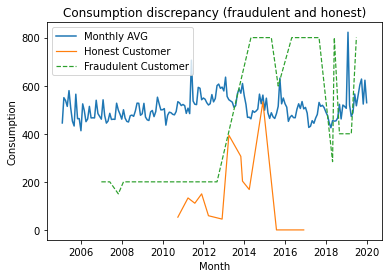

In [ ]:
con_comp("ELEC", 600, 250)

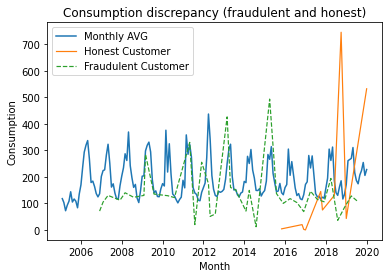

In [ ]:
con_comp("GAZ", 600, 250)

In [ ]:
invoice2=invoice1[0:1000000]

In [ ]:
#rolling_mean

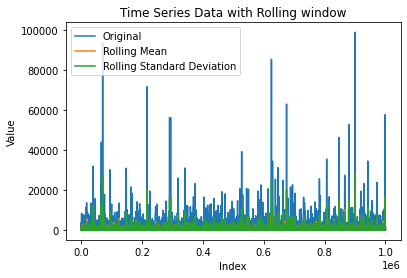

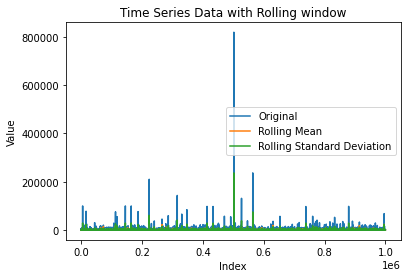

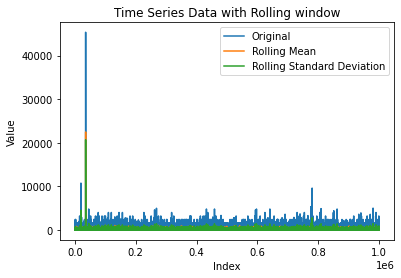

In [ ]:
rolling_mean = invoice2[['invoice_date','consommation_level_1']].rolling(window=12).mean()
rolling_std = invoice2[['invoice_date','consommation_level_1']].rolling(window=12).std()

# Plot the time series data
plt.title("Time Series Data with Rolling window")
plt.plot(invoice2.index, invoice2['consommation_level_1'], label='Original')
plt.plot(invoice2.index, rolling_mean, label='Rolling Mean')
plt.plot(invoice2.index, rolling_std, label='Rolling Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()
rolling_mean = invoice2[['invoice_date','consommation_level_2']].rolling(window=12).mean()
rolling_std = invoice2[['invoice_date','consommation_level_2']].rolling(window=12).std()

# Plot the time series data
plt.title("Time Series Data with Rolling window")
plt.plot(invoice2.index, invoice2['consommation_level_2'], label='Original')
plt.plot(invoice2.index, rolling_mean, label='Rolling Mean')
plt.plot(invoice2.index, rolling_std, label='Rolling Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()
rolling_mean = invoice2[['invoice_date','consommation_level_3']].rolling(window=12).mean()
rolling_std = invoice2[['invoice_date','consommation_level_3']].rolling(window=12).std()

# Plot the time series data
plt.title("Time Series Data with Rolling window")
plt.plot(invoice2.index, invoice2['consommation_level_3'], label='Original')
plt.plot(invoice2.index, rolling_mean, label='Rolling Mean')
plt.plot(invoice2.index, rolling_std, label='Rolling Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()